# Analisis del Desempeño de Empleados

## Librerias

In [3]:
# librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Carga de datos

In [4]:
# Estilo de graficas
sns.set_theme(style="whitegrid")

In [20]:
# Tamano de las graficas
sns.set(
    rc={
        'figure.figsize':(8, 8)
    }
)

In [5]:
# Carga de datos
data = pd.read_csv('./employees_final_dataset.csv')
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17413,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17414,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17415,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


In [6]:
# eliminamos la columna employee_id
data = data.drop('employee_id', axis=1)

# Creamos una copia
dataset = data.copy()
dataset

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
17412,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17413,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17414,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17415,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


## Analisis de valores faltantes

### Estadistica basica

In [7]:
# Codigo para correr las funciones de utils.ipynb
%run utils.ipynb

In [8]:
# Registros duplicados
print("Registros Duplicados: " ,data.duplicated().sum())

# Separador
print("="*40)

# Tamano de la data
print("Las dimensiones de la data son: ", data.shape)

Registros Duplicados:  18
Las dimensiones de la data son:  (17417, 12)


In [10]:
# Cantidad de valores completos
v_complet = dataset.missing.number_complete()
v_complet

206870

In [11]:
# Cantidad de valores faltantes
v_missing = dataset.missing.number_missing()
v_missing

2134

In [12]:
# Porcentaje de valores faltantes en el dataframe
pct_v = (v_missing/v_complet)*100
pct_v

1.0315657176004254

El porcentaje de valores faltantes es de 1.03% lo cual es un valor bastante bajo y por tanto podemos aplicar un proceso de eliminacion en los datos

### Estadistica de las variables segun los datos faltantes

In [13]:
# Estadistica por variable de valores faltantes
dataset.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,department,0,17417,0.000000
1,region,0,17417,0.000000
2,education,771,17417,4.426710
3,gender,0,17417,0.000000
4,recruitment_channel,0,17417,0.000000
5,no_of_trainings,0,17417,0.000000
6,age,0,17417,0.000000
7,previous_year_rating,1363,17417,7.825688
8,length_of_service,0,17417,0.000000
9,KPIs_met_more_than_80,0,17417,0.000000


Claramente observamos que los missing se concentran en dos variables: *education* y *previous_year_rating*. El porcentaje de valores faltantes en *education* es de 4.4% mientras qeu en *previous_year_rating* es de 7.82%

### Analisis de intervalos consecutivo de valores sobre las variables donde se concentran los valores faltantes

In [14]:
dataset.missing.missing_variable_run(variable='education')

,run_length,is_na
0,49,complete
1,1,missing
2,17,complete
3,1,missing
4,21,complete
...,...,...
1490,18,complete
1491,1,missing
1492,24,complete
1493,1,missing


La tabla nos indica que los missing de *education* se encuentran dispersos y no concentrados en ciertas regiones del dataframe.

In [15]:
dataset.missing.missing_variable_run(variable='previous_year_rating')

,run_length,is_na
0,1,missing
1,20,complete
2,1,missing
3,10,complete
4,1,missing
...,...,...
2489,10,complete
2490,1,missing
2491,2,complete
2492,1,missing


La tabla nos indica que los missing de *previous_year_rating* se encuentran dispersos y no concentrados en ciertas regiones del dataframe.

### Visualizacion de Valores Faltantes

<AxesSubplot:>

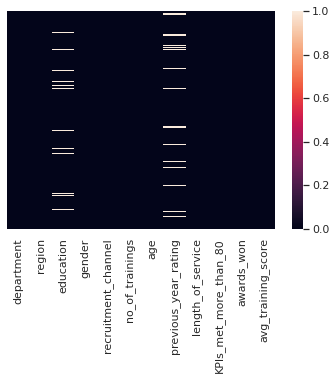

In [16]:
# heatmap de valores faltantes
sns.heatmap(dataset.isnull(), yticklabels=False)

La grafica nos muestra que los valores faltantes en ambas variables no estan relacionados, es decir, donde hay un missing en una hay un valor en la otra. Son aleatorios.

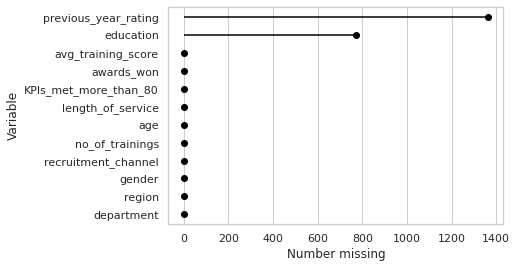

In [17]:
# Grafico de Paleta de los valores faltantes
dataset.missing.missing_variable_plot()

Vemos que hay alrededor de 800 missing en *education* y casi 1400 en *previous_year_rating*.

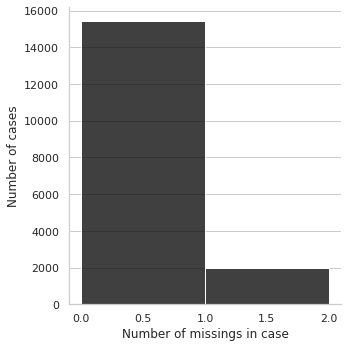

In [18]:
# Histograma de observaciones con datos faltantes
dataset.missing.missing_case_plot()

La grafica nos muestra que existen mas de 15 mil observaciones con 1 solo missing, mientras que hay casi 2 mil registros con 2 missing.

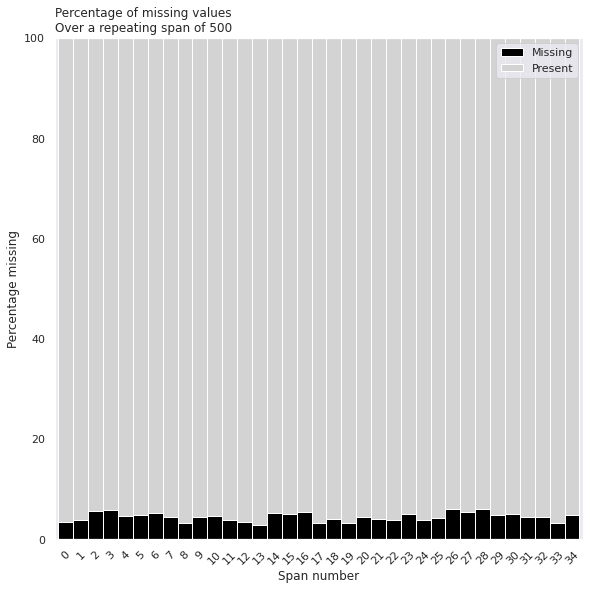

In [24]:
# Visualizacion de missing para rango especificos de una variable especifica
(
    dataset
    .missing
    .missing_variable_span_plot(
        variable='education',
        span_every=500,
        rot=45
    )
)

La grafica nos muestra que en el rango de 1000 a 2000 registros es donde hay una mayor cantidad missing con alrededor de 10. Sin embargo, para cada intervalo hay una cantidad similar de missing. 

## Eliminacion de valores faltantes

In [25]:
# Eliminamos registros duplicados
data = data.drop_duplicates()

# Eliminamos registros con valores nulos
data.dropna(inplace=True)

/tmp/ipykernel_876/3778175009.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [26]:
data.isnull().sum()

department               0
region                   0
education                0
gender                   0
recruitment_channel      0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
KPIs_met_more_than_80    0
awards_won               0
avg_training_score       0
dtype: int64

In [27]:
print("Registros Duplicados: ", data.duplicated().sum())
print("="*40)
print("Las diemnsiones de la data son: ", data.shape)

Registros Duplicados:  0
Las diemnsiones de la data son:  (15416, 12)


## Tratamiento de la variable objetivo

In [30]:
# La variable objetivo es region
data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
1,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
5,Procurement,region_7,Bachelors,m,sourcing,1,36,3.0,2,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...
17410,Sales & Marketing,region_31,Bachelors,m,other,1,42,3.0,10,0,0,53
17411,Sales & Marketing,region_25,Bachelors,m,sourcing,2,28,2.0,5,0,0,45
17412,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17413,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


In [31]:
# En la columna region, solo dejamos los valores numericos
data['region'] = data['region'].str.extract('(\d+)')
data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
1,HR,4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,Procurement,2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,Finance,29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
5,Procurement,7,Bachelors,m,sourcing,1,36,3.0,2,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...
17410,Sales & Marketing,31,Bachelors,m,other,1,42,3.0,10,0,0,53
17411,Sales & Marketing,25,Bachelors,m,sourcing,2,28,2.0,5,0,0,45
17412,Technology,7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17413,HR,7,Bachelors,m,other,1,33,1.0,9,0,0,51


In [32]:
# Tipos de datos de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15416 entries, 1 to 17416
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   department             15416 non-null  object 
 1   region                 15416 non-null  object 
 2   education              15416 non-null  object 
 3   gender                 15416 non-null  object 
 4   recruitment_channel    15416 non-null  object 
 5   no_of_trainings        15416 non-null  int64  
 6   age                    15416 non-null  int64  
 7   previous_year_rating   15416 non-null  float64
 8   length_of_service      15416 non-null  int64  
 9   KPIs_met_more_than_80  15416 non-null  int64  
 10  awards_won             15416 non-null  int64  
 11  avg_training_score     15416 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 1.5+ MB


In [33]:
# convertimos los valores de region a numerico
data['region'] = pd.to_numeric(data['region'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15416 entries, 1 to 17416
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   department             15416 non-null  object 
 1   region                 15416 non-null  int64  
 2   education              15416 non-null  object 
 3   gender                 15416 non-null  object 
 4   recruitment_channel    15416 non-null  object 
 5   no_of_trainings        15416 non-null  int64  
 6   age                    15416 non-null  int64  
 7   previous_year_rating   15416 non-null  float64
 8   length_of_service      15416 non-null  int64  
 9   KPIs_met_more_than_80  15416 non-null  int64  
 10  awards_won             15416 non-null  int64  
 11  avg_training_score     15416 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.5+ MB


## Distribucion de Genero

### Cantidad de Genero

In [34]:
# conteo de genero
gender_counts = data['gender'].value_counts()
gender_counts

m    10806
f     4610
Name: gender, dtype: int64

In [37]:
male_count = (data['gender'] == 'm').sum()
female_count = (data['gender'] == 'f').sum()

print('Total de empleados hombres: ',male_count)
print('Total de empleados mujeres: ', female_count)

Total de empleados hombres:  10806
Total de empleados mujeres:  4610


### Pie chart de genero

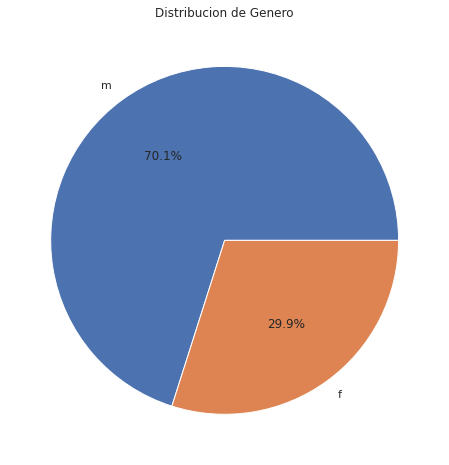

In [36]:
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribucion de Genero');

## Distribucion Canales de Reclutamiento

### Cantidad por canales

In [38]:
recruit_counts = data['recruitment_channel'].value_counts()
recruit_counts

other       8656
sourcing    6473
referred     287
Name: recruitment_channel, dtype: int64

In [39]:
other_count = (data['recruitment_channel'] == 'other').sum()
sourcing_count = (data['recruitment_channel'] == 'sourcing').sum()
referred_count = (data['recruitment_channel'] == 'referred').sum()

print('Cantidad de empleado que ingresaron por referencia: ', referred_count)
print('Cantidad de empleado que ingresaron por propia cuenta: ', sourcing_count)
print('Cantidad de empleado que ingresaron por otro metodo: ', other_count)

Cantidad de empleado que ingresaron por referencia:  287
Cantidad de empleado que ingresaron por propia cuenta:  6473
Cantidad de empleado que ingresaron por otro metodo:  8656


### Pie char de canales de reclutamiento

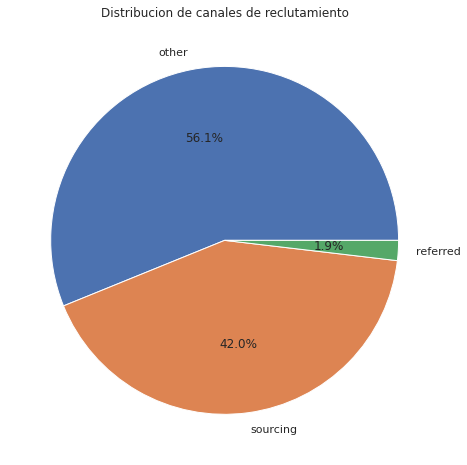

In [40]:
plt.pie(recruit_counts, labels= recruit_counts.index, autopct='%1.1f%%')
plt.title('Distribucion de canales de reclutamiento');